## Exercise - K Means Clustering Algorithm

### Hints given

- Use iris flower data from sklearn library
- Use petal length & width features and drop sepal length & width feautres, it makes your cluster little bit difficult
- Try to form clusters in this data set
- Dataset has a class label and target variable, but we should ignore, use that in the end to confirm the result
- In the end we'll draw an elbow plot, to find the optimal level of K

In [4]:
# let's immport the necessary packages needed
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# let's import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [145]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [146]:
# let's drop sepal length and sepal width, and keep petal length and petal width

In [147]:
dfn = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
dfn.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [148]:
# our data processing is done let's plot a scatter plot for just an observation

In [149]:
x = df['petal length (cm)']
y = df['petal width (cm)']
x.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64

In [150]:
# importing scaater plot
from matplotlib import pyplot as plt
%matplotlib inline

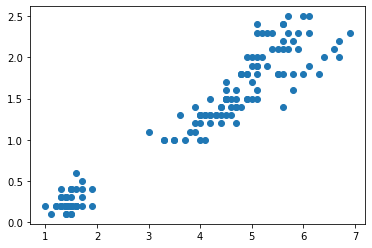

In [151]:
plt.scatter(x,y)

In [152]:
# it seems we have roughly 2 clusters

In [153]:
#now let's assign kmeans value 

In [154]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [155]:
# lets fit and predict values which is done directly in k means

In [156]:
#y_predicted = km.fit_predict(x,y)
#y_predicted
# it showed error because oof 2d array, let's rewrite this code

x = dfn['petal length (cm)']
y = dfn['petal width (cm)']
x.head()

y_predicted = km.fit_predict([x,y])
y_predicted

# let's try to append our values
dfn['Cluster'] = y_predicted
dfn

In [157]:
#The above the mardown cells were error so we'll keep the below code

In [158]:
y_predicted = km.fit_predict(dfn[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
 # let's try to append the values with our data frame

In [160]:
dfn.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [161]:
dfn['Cluster'] = y_predicted
dfn.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [162]:
dfn.Cluster.unique()

array([1, 0])

In [163]:
# since we have 2 values (1,0), we are proceeding further steps
# let's do a scatter plot, for that first we need to assign values

In [164]:
df1 = dfn[dfn.Cluster==0]
df2 = dfn[dfn.Cluster==1]

In [165]:
# let's start to plot

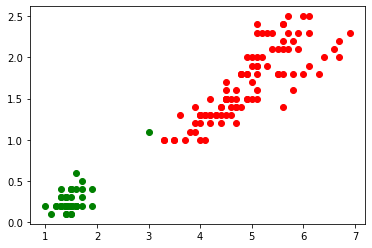

In [166]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')


In [167]:
## our graph has starting value as 0
# we need not to do some preprocessing and use minmaxscaler
# to chk we'll do in last

In [168]:
km.cluster_centers_
# this is done to know the values of centroid

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [169]:
# let's add cluster point in scatter graph

No handles with labels found to put in legend.


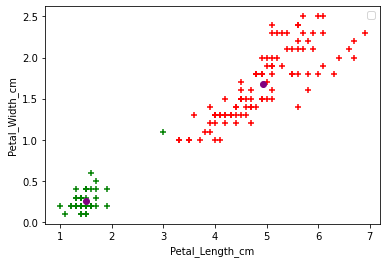

In [174]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker="+")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green', marker="+")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple')

plt.xlabel('Petal_Length_cm')
plt.ylabel('Petal_Width_cm')

plt.legend()


### To show legend we need label to be mentioned in our code

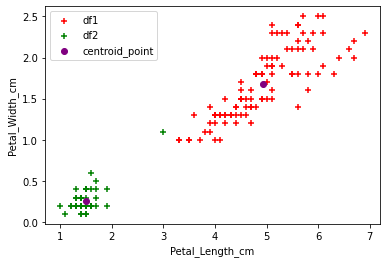

In [173]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker="+", label='df1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green', marker="+", label='df2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', label='centroid_point')

plt.xlabel('Petal_Length_cm')
plt.ylabel('Petal_Width_cm')

plt.legend()


In [78]:
# let's use elbow method

In [81]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfn[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\ezhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.46598901098901,
 13.91690875790876,
 11.036333877751735,
 9.243251333207859,
 7.624193062579726,
 6.614224386724387]

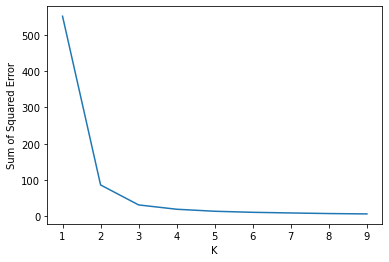

In [85]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

plt.plot(k_rng, sse)

In [86]:
# it is clear that the value of k=2, our elbow

In [87]:
# extra verification of minmaxscaler

In [92]:
scaler = MinMaxScaler()
scaler.fit(dfn[['petal length (cm)']])
dfn[["petal length (cm)"]] = scaler.transform(dfn[['petal length (cm)']])

scaler.fit(dfn[['petal width (cm)']])
dfn[['petal width (cm)']]= scaler.transform(dfn[['petal width (cm)']])
dfn.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [96]:
# this step is not needed for this problem

In [104]:
dfn[50:].head()

,petal length (cm),petal width (cm),Cluster
50,0.627119,0.541667,0
51,0.593220,0.583333,0
52,0.661017,0.583333,0
53,0.508475,0.500000,0
54,0.610169,0.583333,0


In [123]:
# let's check from where the value of cluster starts with 0
dfn[dfn.Cluster==0].head()

,petal length (cm),petal width (cm),Cluster
50,0.627119,0.541667,0
51,0.593220,0.583333,0
52,0.661017,0.583333,0
53,0.508475,0.500000,0
54,0.610169,0.583333,0
